#  Feature Extarction 

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

## Load Dataset

In [2]:
email = pd.read_csv("new_email.csv")
email

,CONTENT,CLASS
0,eat shit john j lavorato john arnold football ...,Abusive
1,fuck,Abusive
2,gentleman following champagne available approx...,Abusive
3,sorry taken long trying fend chick life sooooo...,Abusive
4,asshole john j lavorato john arnold john cant ...,Abusive
...,...,...
24651,need new lead business need increased internet...,Non Abusive
24652,garth brook wrapped win ticket trip garth broo...,Non Abusive
24653,dear smartreminders member franchoice free one...,Non Abusive
24654,kid rock forever official kid rock site kidroc...,Non Abusive


In [3]:
email['LABEL'] = email['CLASS'].map({'Abusive': 0, 'Non Abusive': 1})
email

,CONTENT,CLASS,LABEL
0,eat shit john j lavorato john arnold football ...,Abusive,0
1,fuck,Abusive,0
2,gentleman following champagne available approx...,Abusive,0
3,sorry taken long trying fend chick life sooooo...,Abusive,0
4,asshole john j lavorato john arnold john cant ...,Abusive,0
...,...,...,...
24651,need new lead business need increased internet...,Non Abusive,1
24652,garth brook wrapped win ticket trip garth broo...,Non Abusive,1
24653,dear smartreminders member franchoice free one...,Non Abusive,1
24654,kid rock forever official kid rock site kidroc...,Non Abusive,1


###  Checking for null values 

In [4]:
email.isnull().sum()

CONTENT    124
CLASS        0
LABEL        0
dtype: int64

###  Dropping the null values 

In [5]:
email.dropna(axis=0, inplace=True)

In [6]:
email.isnull().sum()

CONTENT    0
CLASS      0
LABEL      0
dtype: int64

# Feature Extraction 

## 1)  Bag of words 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
x = cv.fit_transform(email["CONTENT"])
freq_words = pd.DataFrame({'term': cv.get_feature_names(), 'occurrences':np.asarray(x.sum(axis=0)).ravel().tolist()})
freq_words['frequency'] = freq_words['occurrences']/np.sum(freq_words['occurrences'])

In [9]:
freq_words.head(25)

,term,occurrences,frequency
0,aa,392,0.000118
1,aaron,182,0.000055
2,abc,529,0.000160
3,abc length,152,0.000046
4,abc length document,152,0.000046
5,abc math,152,0.000046
6,abc math random,152,0.000046
7,abc substring,152,0.000046
8,abc substring abc,152,0.000046
9,abel,187,0.000056


##  2) TF-ID 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfid_vec = TfidfVectorizer( max_features= 5000, smooth_idf=True,ngram_range=(1,3))
doc_vec = tfid_vec.fit_transform(email["CONTENT"])
names_features = tfid_vec.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
data = pd.DataFrame(denselist, columns = names_features)

In [12]:
data 

,aa,aaron,abc,abc length,abc length document,abc math,abc math random,abc substring,abc substring abc,abel,ability,able,absence,absolutely,ac,accenture,accept,acceptance,acceptance create,acceptance create evidence,accepted,access,according,accordingly,account,accounting,accrual,accuracy,accurate,achieve,acquisition,across,act,act upon,act upon request,action,active,active epmi,active ng,activity,...,writing,written,wrong,wrote,wrs,wti,wti dec,xl,xp,ya,yahoo,yard,yard allowed,yard allowed per,yard carry,yeah,year,year ago,year end,year old,year rank,year rank fantasy,yes,yesterday,yet,yield,yo,york,york city,york time,young,ypc,yr,zadow,zadow raetta,zdnet,zero,zip,zipper,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.469811,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089517,0.0,0.0,0.0,0.0,0.000000,0.057181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0

### we are using TF-ID because it is better than bag of words 

## Dependent variable 

In [13]:
y = email.LABEL
y

0        0
1        0
2        0
3        0
4        0
        ..
24651    1
24652    1
24653    1
24654    1
24655    1
Name: LABEL, Length: 24532, dtype: int64

##    Applying SMOTE to remove the imbalanced class 

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
sm = SMOTE()

In [17]:
X_smote, y_smote = sm.fit_resample(doc_vec,y)

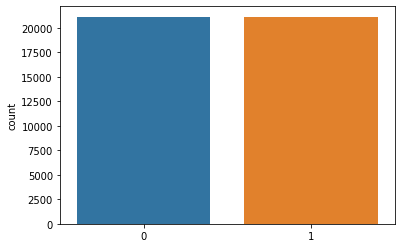

In [18]:
sns.countplot(y_smote)

###    Splitting the dataset as train and test 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.25,random_state=0)

#  Model Bulding 

## Model 1 - Naive bayes 

In [21]:
from sklearn.naive_bayes import MultinomialNB  

In [22]:
model_naive = MultinomialNB()

In [23]:
model_naive.fit(X_train, y_train)  

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Model Evaluation 1 - Naive bayes 

In [25]:
  from sklearn.metrics import confusion_matrix  
  from sklearn.metrics import classification_report
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score

In [26]:
y_pred_naive = model_naive.predict(X_test)

In [27]:
acc_naive_train = accuracy_score(y_train, model_naive.predict(X_train))
acc_naive_test = accuracy_score(y_test, y_pred_naive)
print(acc_naive_train)
print(acc_naive_test)

0.867913814315909
0.85785937352134


In [28]:
prec_naive = precision_score(y_test, y_pred_naive,average="macro")
reca_naive = recall_score(y_test, y_pred_naive,average= "macro")
print(prec_naive)
print(reca_naive)

0.858510907066895
0.8578694615718097


In [29]:
print(classification_report(y_test, y_pred_naive))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5281
           1       0.87      0.84      0.85      5286

    accuracy                           0.86     10567
   macro avg       0.86      0.86      0.86     10567
weighted avg       0.86      0.86      0.86     10567



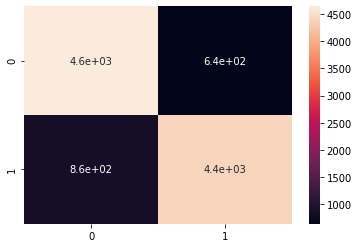

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred_naive),annot=True)

## Model 2 - Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model_logistic = LogisticRegression(random_state = 0)

In [33]:
model_logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation - Logistic Regression

In [34]:
y_pred_logistic = model_logistic.predict(X_test)

In [35]:
acc_logistic_train = accuracy_score(y_train, model_logistic.predict(X_train))
acc_logistic_test = accuracy_score(y_test, y_pred_logistic)
print(acc_logistic_train)
print(acc_logistic_test)

0.9452348654531688
0.9315794454433614


In [36]:
prec_logistic = precision_score(y_test, y_pred_logistic,average="macro")
reca_logistic = recall_score(y_test, y_pred_logistic,average= "macro")
print(prec_logistic)
print(reca_logistic)

0.931995363327561
0.9315868185285481


In [37]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      5281
           1       0.95      0.92      0.93      5286

    accuracy                           0.93     10567
   macro avg       0.93      0.93      0.93     10567
weighted avg       0.93      0.93      0.93     10567



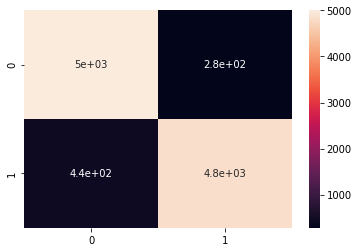

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred_logistic),annot=True)

## Model 3 - Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model_random = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state = 0)

In [41]:
model_random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Model Evaluation - Random Forest

In [42]:
y_pred_random = model_random.predict(X_test)

In [43]:
acc_random_train = accuracy_score(y_train, model_random.predict(X_train))
acc_random_test = accuracy_score(y_test, y_pred_random)
print(acc_random_train)
print(acc_random_test)

0.9976970882362219
0.9706633860130596


In [44]:
prec_random = precision_score(y_test, y_pred_random,average="macro")
reca_random = recall_score(y_test, y_pred_random,average= "macro")
print(prec_random)
print(reca_random)

0.9710172655959286
0.9706699170628821


In [45]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5281
           1       0.98      0.96      0.97      5286

    accuracy                           0.97     10567
   macro avg       0.97      0.97      0.97     10567
weighted avg       0.97      0.97      0.97     10567



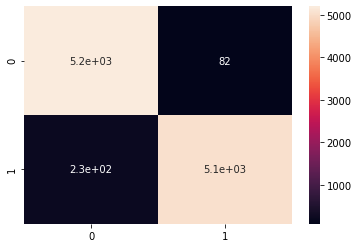

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred_random),annot=True)

## Model 4 - Decison Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_decision = DecisionTreeClassifier(criterion= 'entropy',random_state = 0)

In [49]:
model_decision.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Model Evaluation Decison Tree Classifier 

In [50]:
y_pred_decision = model_decision.predict(X_test)

In [51]:
acc_decision_train = accuracy_score(y_train, model_decision.predict(X_train))
acc_decision_test = accuracy_score(y_test, y_pred_decision)
print(acc_decision_train)
print(acc_decision_test)

0.9976970882362219
0.9360272546607362


In [52]:
prec_decision = precision_score(y_test, y_pred_decision,average="macro")
reca_decision = recall_score(y_test, y_pred_decision,average= "macro")
print(prec_decision)
print(reca_decision)

0.9371097199374152
0.9360390617841085


In [53]:
print(classification_report(y_test, y_pred_decision))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5281
           1       0.96      0.91      0.93      5286

    accuracy                           0.94     10567
   macro avg       0.94      0.94      0.94     10567
weighted avg       0.94      0.94      0.94     10567



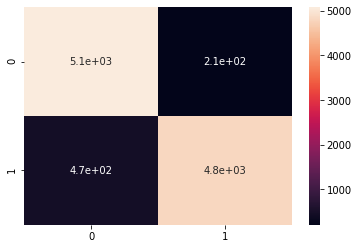

In [54]:
sns.heatmap(confusion_matrix(y_test,y_pred_decision),annot=True)

## Model 5 - KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier 

In [56]:
model_knn = KNeighborsClassifier()

In [57]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Model Evaluation KNN 

In [58]:
y_pred_knn = model_knn.predict(X_test)

In [59]:
acc_knn_train = accuracy_score(y_train, model_knn.predict(X_train))
acc_knn_test = accuracy_score(y_test, y_pred_knn)
print(acc_knn_train)
print(acc_knn_test)

0.7295813748067762
0.6858143276237343


In [60]:
prec_knn = precision_score(y_test, y_pred_knn,average="macro")
reca_knn = recall_score(y_test, y_pred_knn,average= "macro")
print(prec_knn)
print(reca_knn)

0.8034411782379367
0.6859615775770234


In [61]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      5281
           1       0.99      0.37      0.54      5286

    accuracy                           0.69     10567
   macro avg       0.80      0.69      0.65     10567
weighted avg       0.80      0.69      0.65     10567



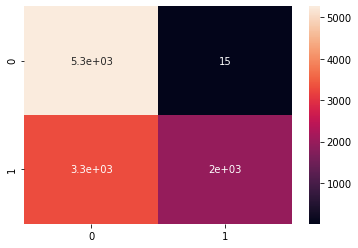

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True)

## Model 6 - Support Vector Classifier

In [63]:
from sklearn.svm import SVC 

In [64]:
model_svc = SVC(kernel= "linear",random_state = 0) 

In [65]:
model_svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Model Evaluation Support Vector Machine

In [66]:
y_pred_svc = model_svc.predict(X_test)

In [67]:
acc_svc_train = accuracy_score(y_train, model_svc.predict(X_train))
acc_svc_test = accuracy_score(y_test, y_pred_svc)
print(acc_svc_train)
print(acc_svc_test)

0.9585475882519954
0.9391501845367654


In [68]:
prec_svc = precision_score(y_test, y_pred_svc,average="macro")
reca_svc = recall_score(y_test, y_pred_svc,average= "macro")
print(prec_svc)
print(reca_svc)

0.9398312974724758
0.939159529558022


In [69]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5281
           1       0.96      0.92      0.94      5286

    accuracy                           0.94     10567
   macro avg       0.94      0.94      0.94     10567
weighted avg       0.94      0.94      0.94     10567



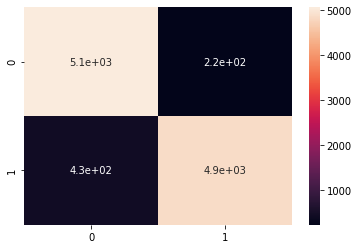

In [70]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot=True)

In [71]:
table = pd.DataFrame({'MODELS':['Naive Bayes','Logistic Regression','Random Forest','Decision Tree','KNN','SVC'],
         'ACCURACY-TRAIN':[acc_naive_train,acc_logistic_train,acc_random_train,acc_decision_train,acc_knn_train,acc_svc_train],
         'ACCURACY-TEST':[acc_naive_test,acc_logistic_test,acc_random_test,acc_decision_test,acc_knn_test,acc_svc_test],
         'PRECISION':[prec_naive,prec_logistic,prec_random,prec_decision,prec_knn,prec_svc],
         'RECALL':[reca_naive,reca_logistic,reca_random,reca_decision,reca_knn,reca_svc]})
table

,MODELS,ACCURACY-TRAIN,ACCURACY-TEST,PRECISION,RECALL
0,Naive Bayes,0.867914,0.857859,0.858511,0.857869
1,Logistic Regression,0.945235,0.931579,0.931995,0.931587
2,Random Forest,0.997697,0.970663,0.971017,0.970670
3,Decision Tree,0.997697,0.936027,0.937110,0.936039
4,KNN,0.729581,0.685814,0.803441,0.685962
5,SVC,0.958548,0.939150,0.939831,0.939160


# Saving file as pickle

In [72]:
import pickle 

In [73]:
pickle.dump(tfid_vec,open('vectorization.pkl','wb'))
pickle.dump(model_random,open('finalmodel.pkl','wb'))